In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 5_6311828550303351502.rtf.gdoc
 a32b6b41-69b9-4299-8e3b-ecec34e68b59.pdf
 AdmitCard_80053079.pdf
'CBSE - JOINT ENTRANCE EXAMINATION (MAIN) - 2018.pdf'
'C certi.pdf'
 Classroom
 Codechef
'Colab Notebooks'
 Contacts.vcf
 data_for_colab_ritik.zip
 Datasets
'Document 4_1.jpg'
 Fake-New-LSTM-master
'fee recipient sem 4.htm'
'How to get started with Drive.pdf'
'https:  www.pointers.gdoc'
 icecream.gdoc
 IMG_20160302_094057.jpg
 IMG_20160302_094104.jpg
 IMG_20160302_094110.jpg
 IMG_20160302_094114.jpg
 IMG_20180529_084931.jpg
 IMG_20180529_113713.jpg
'JoSAA 2018: Locked Choices of the Roll Number- 28716896.pdf'
'JoSAA 7.pdf'
'JoSAA allotment .pdf'
'My Drive'
'New Doc 2019-01-12 22.22.09_1.pdf'
'New Doc 2019-01-12 22.22.51_1.pdf'
'Number Theory .gdoc'
 OD104598888636702000_invoice.pdf
 paymenthistoryredirecturl.pdf
 Resume
'Resume (1).gdoc'
'Resume (2).gdoc'
'Resume (3).gdoc'
'Resume (4).gdoc'
 Resume.gdoc
 Ritik
'Ritik adhar card.pdf'
'Ritik signature.pdf'
'riya ad

In [ ]:
#Reading the dataset
data=pd.read_csv("/content/gdrive/MyDrive/Classroom/googleplaystore_user_reviews.csv")

In [ ]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df=pd.concat([data.Translated_Review,data.Sentiment],axis=1)
df.dropna(axis=0,inplace=True)
df.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral
10,good you.,Positive
11,Useful information The amount spelling errors ...,Positive


In [ ]:
df.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in df.Sentiment]
df.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,0
1,This help eating healthy exercise regular basis,0
3,Works great especially going grocery store,0
4,Best idea us,0
5,Best way,0
6,Amazing,0
8,"Looking forward app,",2
9,It helpful site ! It help foods get !,2
10,good you.,0
11,Useful information The amount spelling errors ...,0


In [ ]:
messages=df.copy();
messages.reset_index(inplace=True)
#stopwords (irrelavent words)
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Translated_Review'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
corpus[0]

'like eat delici food cook food case best food help lot also best shelf life'

In [ ]:
## Applying TfidfVectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=1000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(37427, 1000)

In [ ]:
y=messages['Sentiment']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
cv.get_feature_names()[:20]

['abil',
 'abl',
 'absolut',
 'absolut love',
 'accept',
 'access',
 'account',
 'accur',
 'across',
 'action',
 'activ',
 'actual',
 'ad',
 'ad ad',
 'ad free',
 'ad pop',
 'add',
 'addict',
 'addict game',
 'addit']

In [ ]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [ ]:
count_df.head()

,abil,abl,absolut,absolut love,accept,access,account,accur,across,action,activ,actual,ad,ad ad,ad free,ad pop,add,addict,addict game,addit,advanc,advert,advertis,age,ago,alarm,alert,allow,almost,along,alot,alreadi,also,although,alway,amaz,amazon,amount,android,angri,...,went,whatev,whenev,whole,widget,wifi,win,wish,wish could,within,without,wonder,wont,word,work,work fine,work great,work properli,work well,workout,world,wors,worst,worth,would,would better,would give,would great,would like,would love,would nice,wow,write,wrong,ye,year,year ago,year old,yet,youtub
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488727,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292974,0.247758,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.208607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import itertools
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# **Logistic  Regression**





In [ ]:
#fitting 
from sklearn.linear_model import LogisticRegression
Logisitic_classifier=LogisticRegression(random_state=0)
Logisitic_classifier.fit(X_train,y_train)
y_pred=Logisitic_classifier.predict(X_test)

Accuracy:   0.881
Confusion matrix, without normalization
F1 Score 0.8422088891510553
Precision Score 0.8565173201755968 
Recall Score 0.8310318469851156


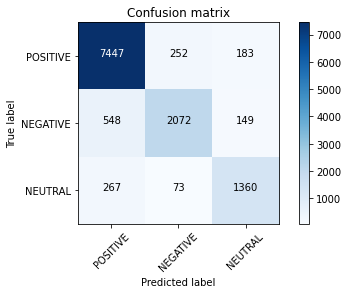

In [ ]:
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['POSITIVE', 'NEGATIVE','NEUTRAL'])
print("F1 Score {}".format(f1_score(y_test, y_pred, average="macro")))
print("Precision Score {} ".format(precision_score(y_test, y_pred, average="macro")))
print("Recall Score {}".format(recall_score(y_test, y_pred, average="macro"))) 

Accuracy:   0.887
Confusion matrix, without normalization
F1 Score 0.8513569528953818
Precision Score 0.8575373030728165 
Recall Score 0.8514067741254329


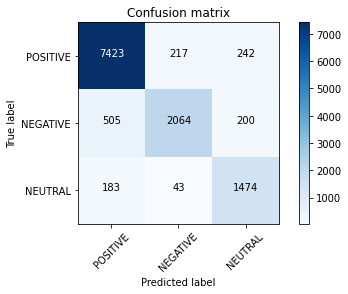

In [ ]:
params={
 "penalty"    : ['l1', 'l2', 'elasticnet'] ,
 "C"          : [ 1.0,.5,1.2,.75],
 "solver"     : [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 "max_iter"   : [ 100,75,200,50 ],  
}
random_search=RandomizedSearchCV(Logisitic_classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5)
random_search.fit(X_train,y_train)
Logisitic_classifier=random_search.best_estimator_
Logisitic_classifier.fit(X_train,y_train)
y_pred=Logisitic_classifier.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['POSITIVE', 'NEGATIVE','NEUTRAL'])
print("F1 Score {}".format(f1_score(y_test, y_pred, average="macro")))
print("Precision Score {} ".format(precision_score(y_test, y_pred, average="macro")))
print("Recall Score {}".format(recall_score(y_test, y_pred, average="macro"))) 


# **Random Forest Classifier**

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
RandomForest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RandomForest_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = RandomForest_classifier.predict(X_test)

accuracy:   0.880
Confusion matrix, without normalization
0.8432912566962617
0.8678900409869095
0.8272791923099411


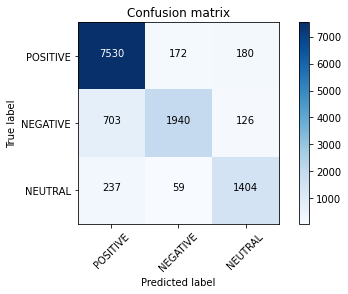

In [ ]:
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['POSITIVE', 'NEGATIVE','NEUTRAL'])
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))  

In [ ]:
params={
 "n_estimators"    : [100,90,120] ,
 "min_impurity_split"     : [ 1e-7,1e-6],  
}
random_search=RandomizedSearchCV(RandomForest_classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5)
random_search.fit(X_train,y_train)
RandomForest_classifier=random_search.best_estimator_
RandomForest_classifier.fit(X_train,y_train)
y_pred=RandomForest_classifier.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['POSITIVE', 'NEGATIVE','NEUTRAL'])
print("F1 Score {}".format(f1_score(y_test, y_pred, average="macro")))
print("Precision Score {} ".format(precision_score(y_test, y_pred, average="macro")))
print("Recall Score {}".format(recall_score(y_test, y_pred, average="macro")))

# **Passive Aggressive Classifier**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAC_classifier = PassiveAggressiveClassifier(n_iter_no_change=50)
PAC_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = PAC_classifier.predict(X_test)

accuracy:   0.846
Confusion matrix, without normalization
0.7815188293836618
0.814012505712868
0.7751717456327479


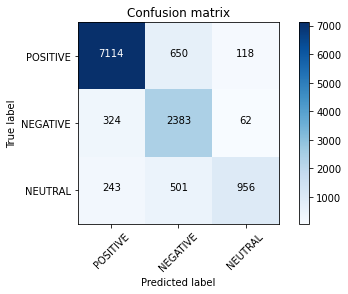

In [ ]:
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['POSITIVE', 'NEGATIVE','NEUTRAL'])
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))  

Accuracy:   0.865
Confusion matrix, without normalization
F1 Score 0.8319999793536539
Precision Score 0.8110574003576813 
Recall Score 0.8593720092564312


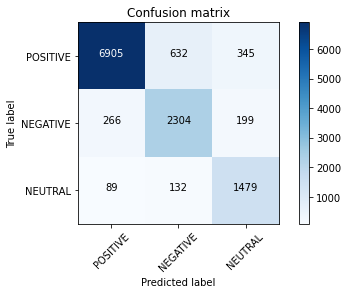

In [ ]:
params={
 "C"          : [ 1.0,.5,1.2,.75],
 "n_iter_no_change"     : [5,7,10,4],
 "max_iter"   : [ 1000,750,2000,500 ],  
}
random_search=RandomizedSearchCV(PAC_classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5)
random_search.fit(X_train,y_train)
PAC_classifier=random_search.best_estimator_
PAC_classifier.fit(X_train,y_train)
y_pred=PAC_classifier.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['POSITIVE', 'NEGATIVE','NEUTRAL'])
print("F1 Score {}".format(f1_score(y_test, y_pred, average="macro")))
print("Precision Score {} ".format(precision_score(y_test, y_pred, average="macro")))
print("Recall Score {}".format(recall_score(y_test, y_pred, average="macro"))) 